#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

Data: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/1#

In [1]:
!nvidia-smi

Sun Oct  6 13:51:49 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 14.9 MB/s eta 0:00:00a 0:00:01


**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.5 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Z4dN3gIkzs0lcKpz99ax")
project = rf.workspace("yeolduri").project("smoking-hvni4")
version = project.version(3)
dataset = version.download("yolov11")


  Using cached roboflow-1.1.47-py3-none-any.whl.metadata (9.7 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 2.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to smoking-3 in yolov11:: 100%|██████████| 4686/4686 [00:00<00:00, 7440.76it/s]


In [10]:
dataset.location

'/kaggle/working/smoking-3'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [11]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=150 imgsz=640

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 64.6MB/s]
Ultralytics 8.3.5 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/smoking-3/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

**Step # 05 Examine Training Results**

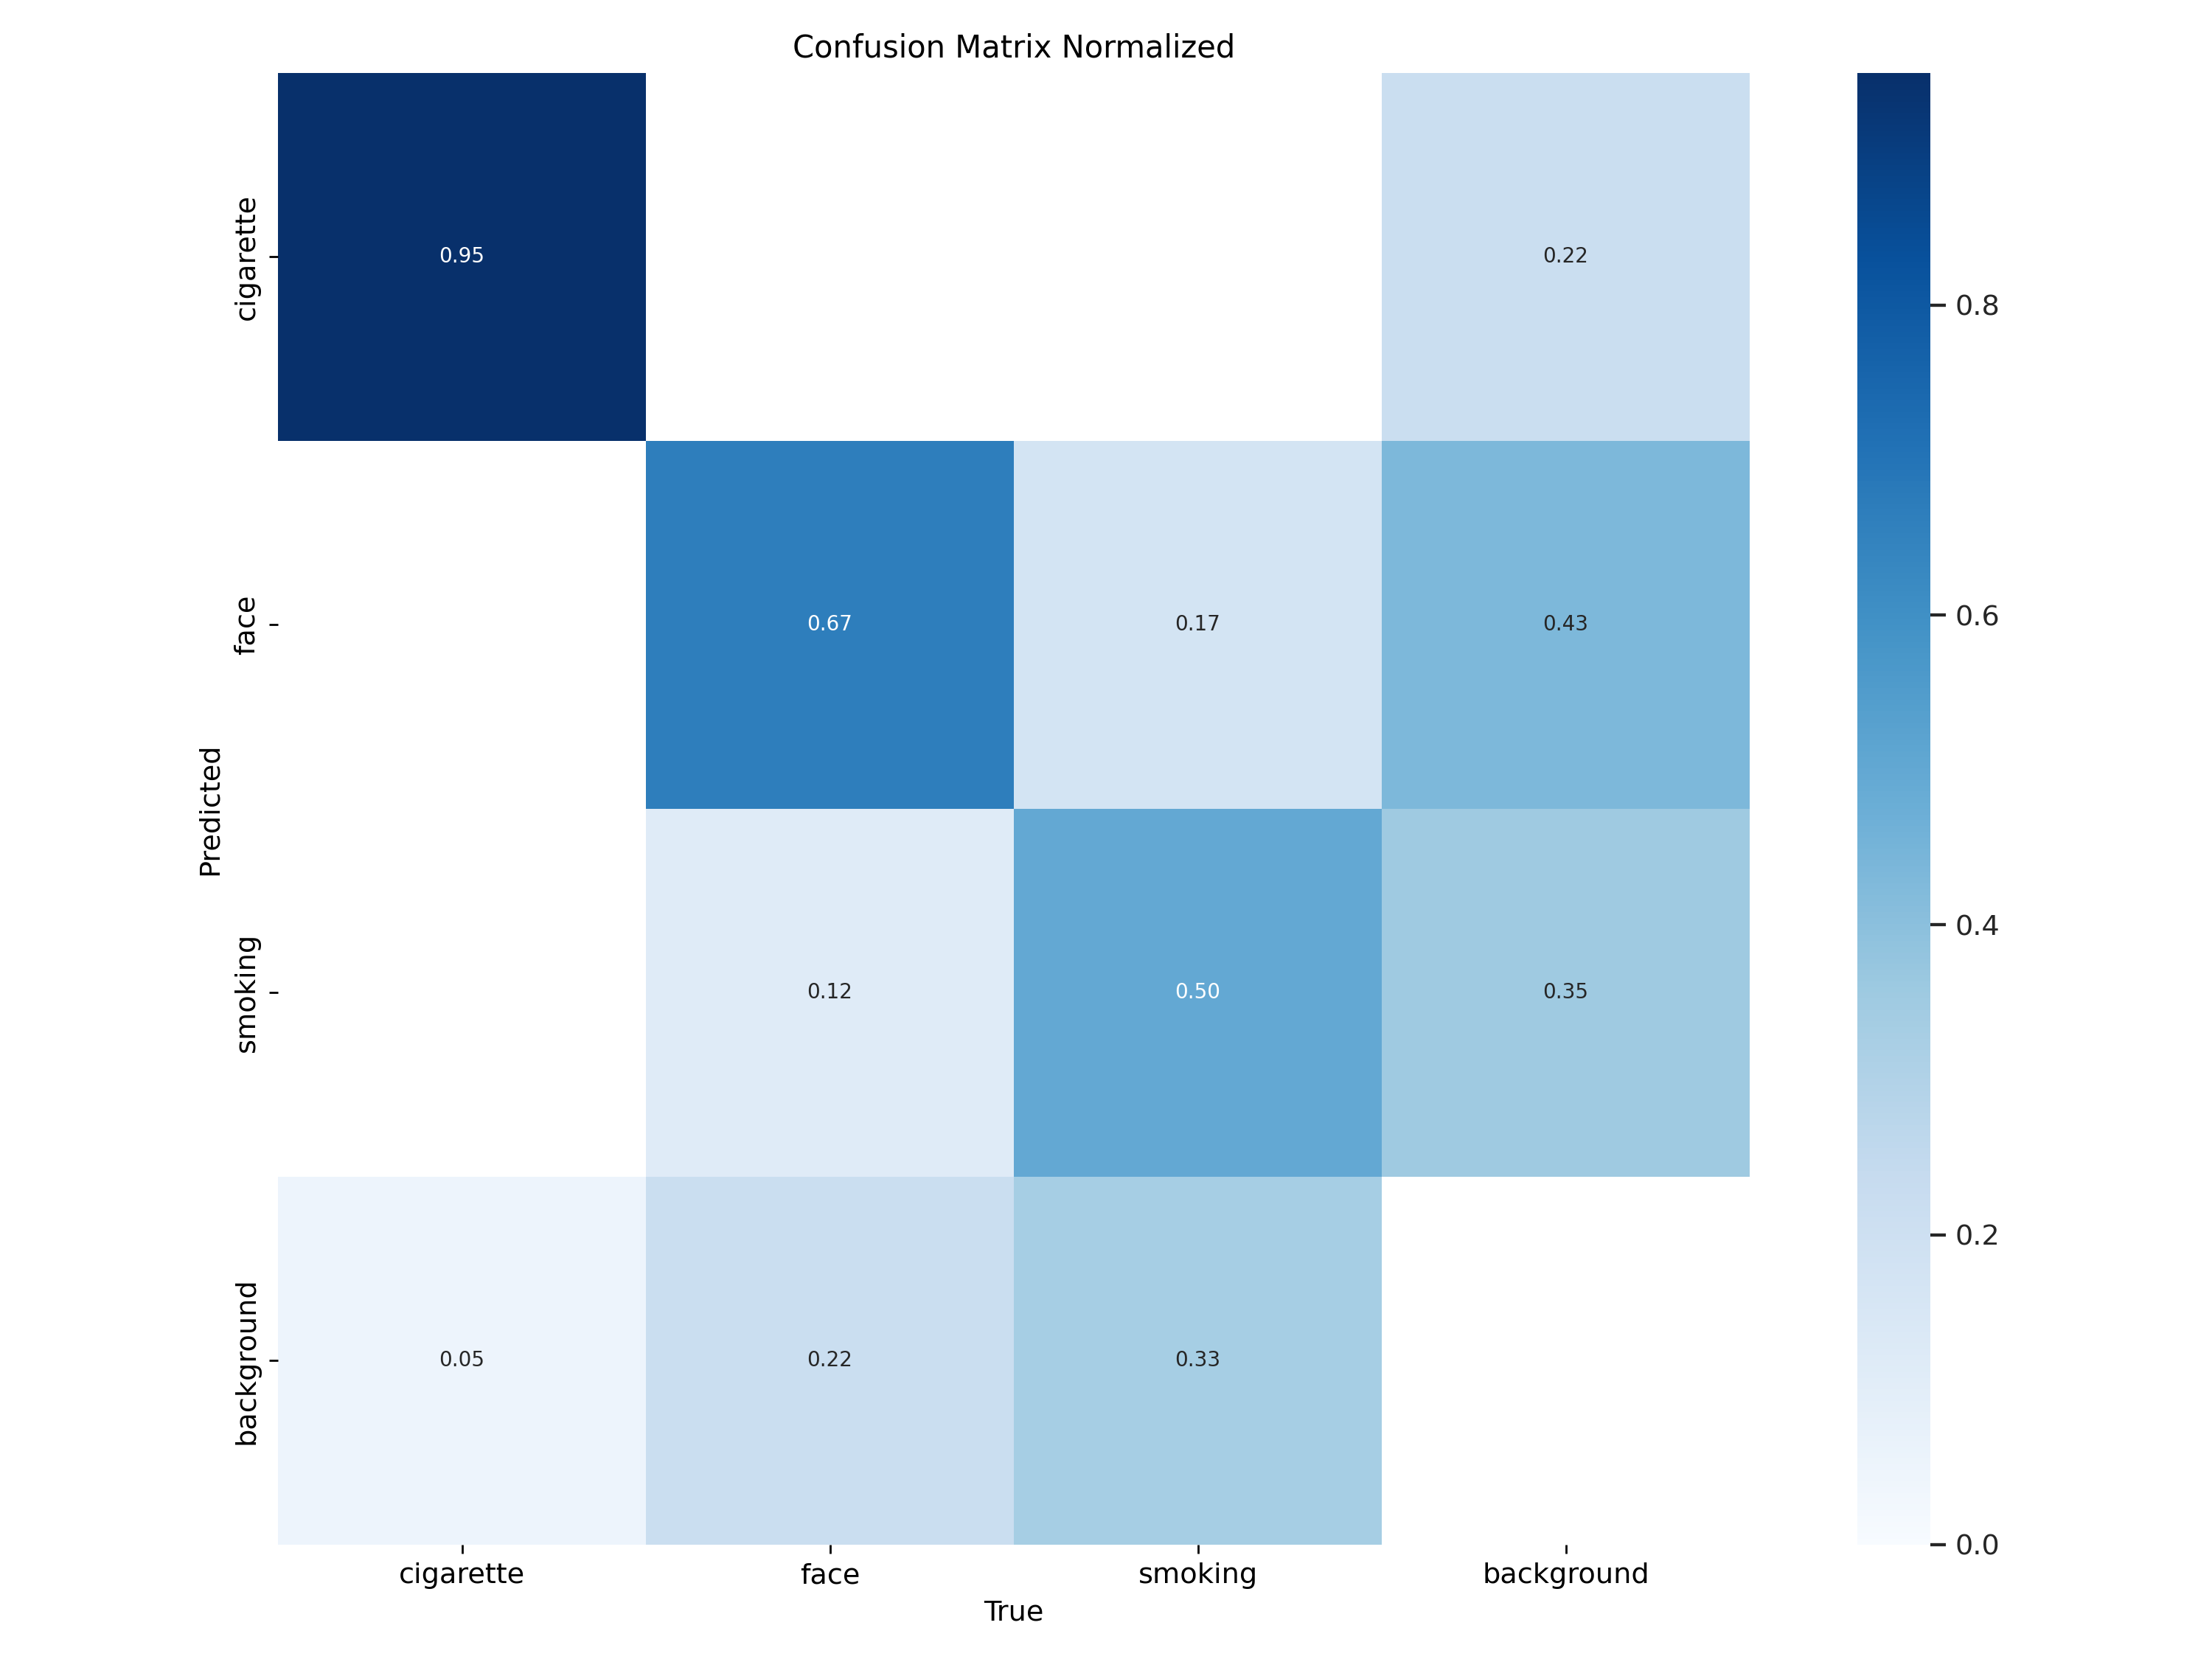

In [12]:
Image("/kaggle/working/runs/detect/train/confusion_matrix_normalized.png", width=600)

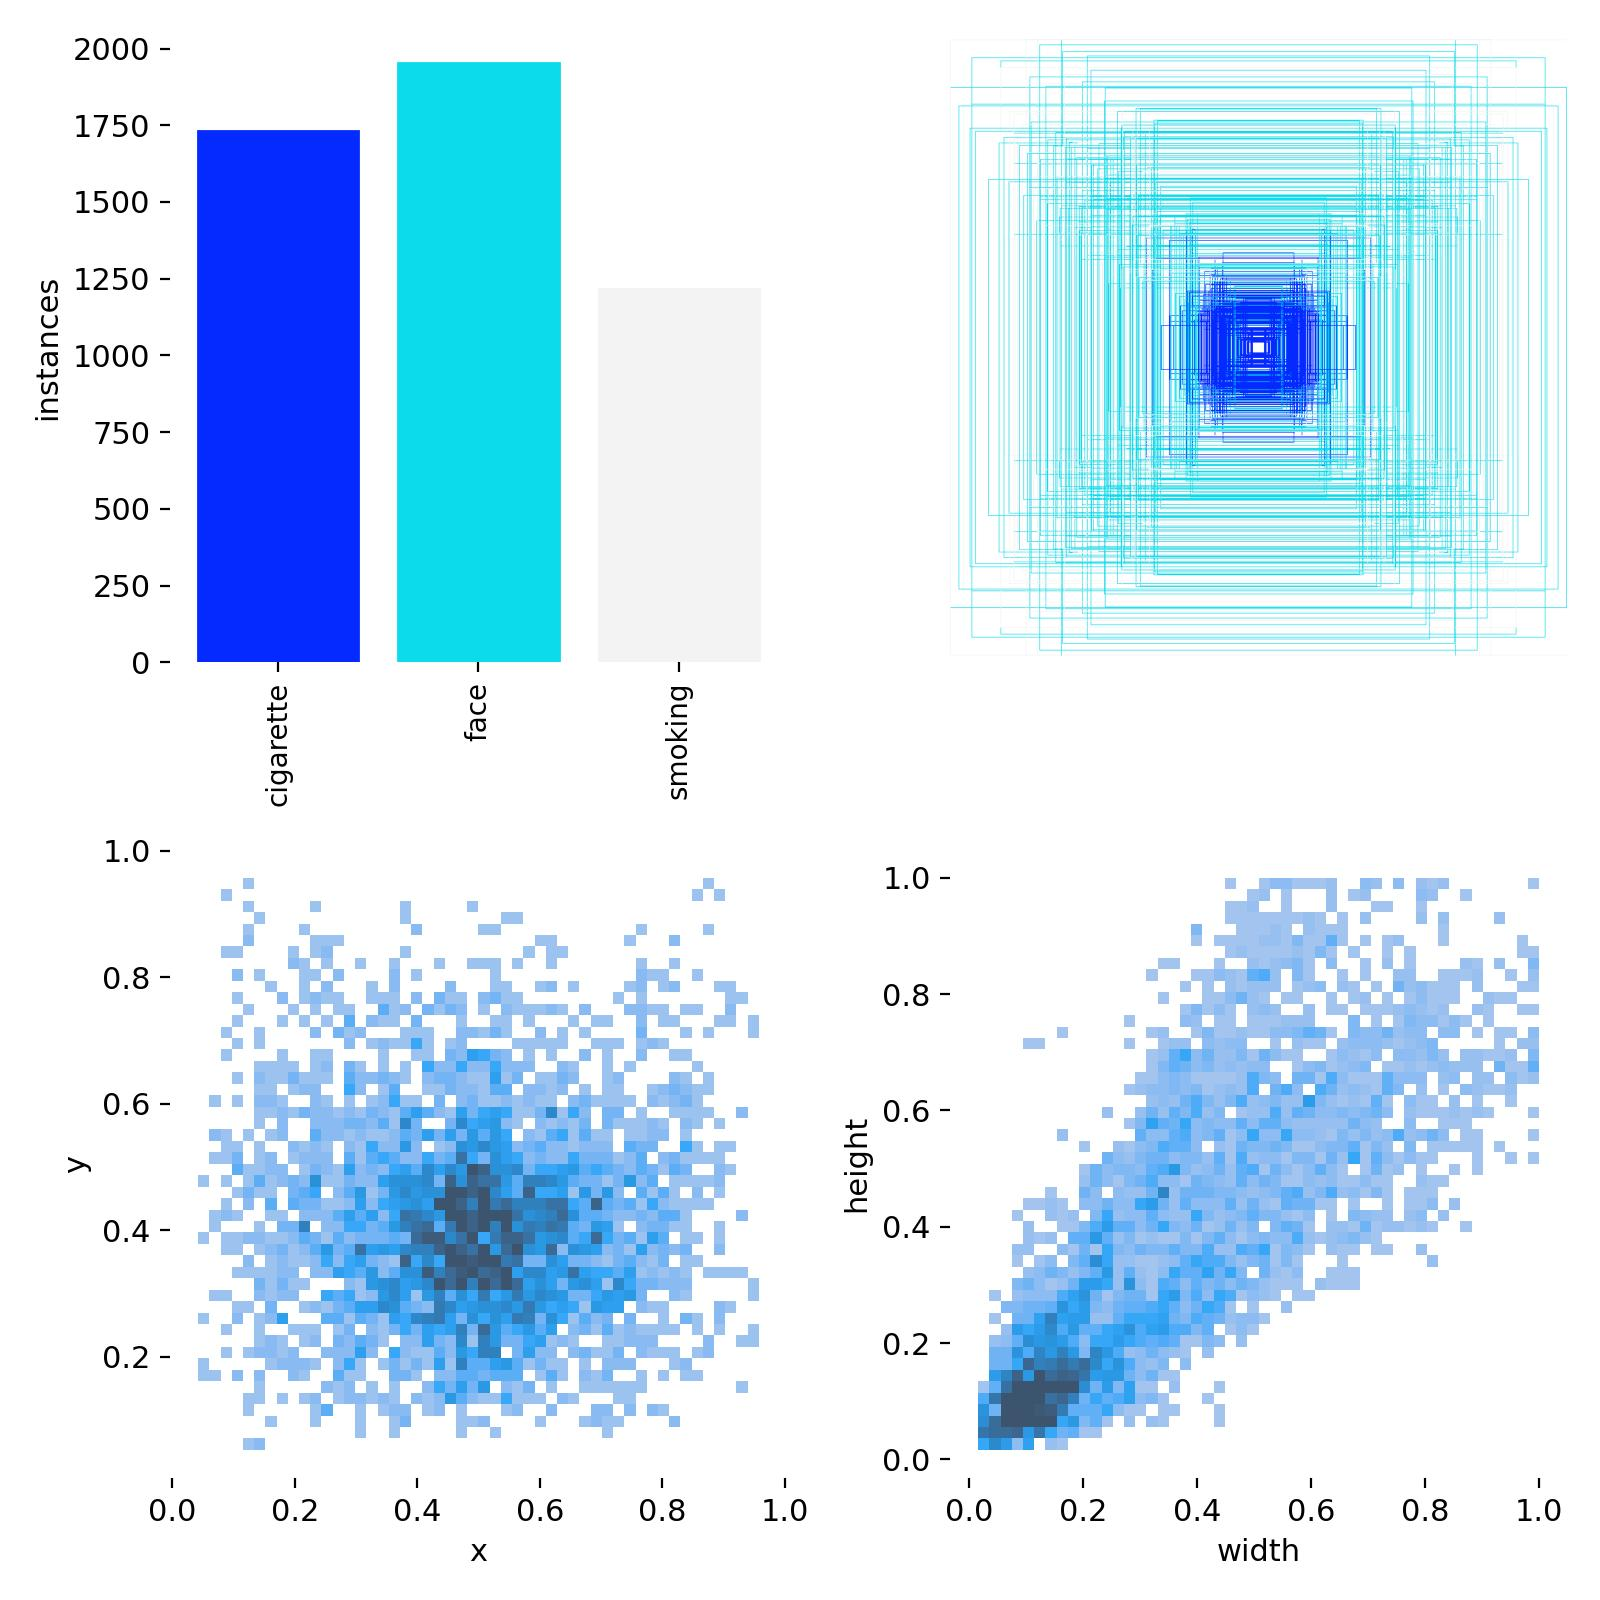

In [15]:
Image("/kaggle/working/runs/detect/train/labels.jpg", width=600)

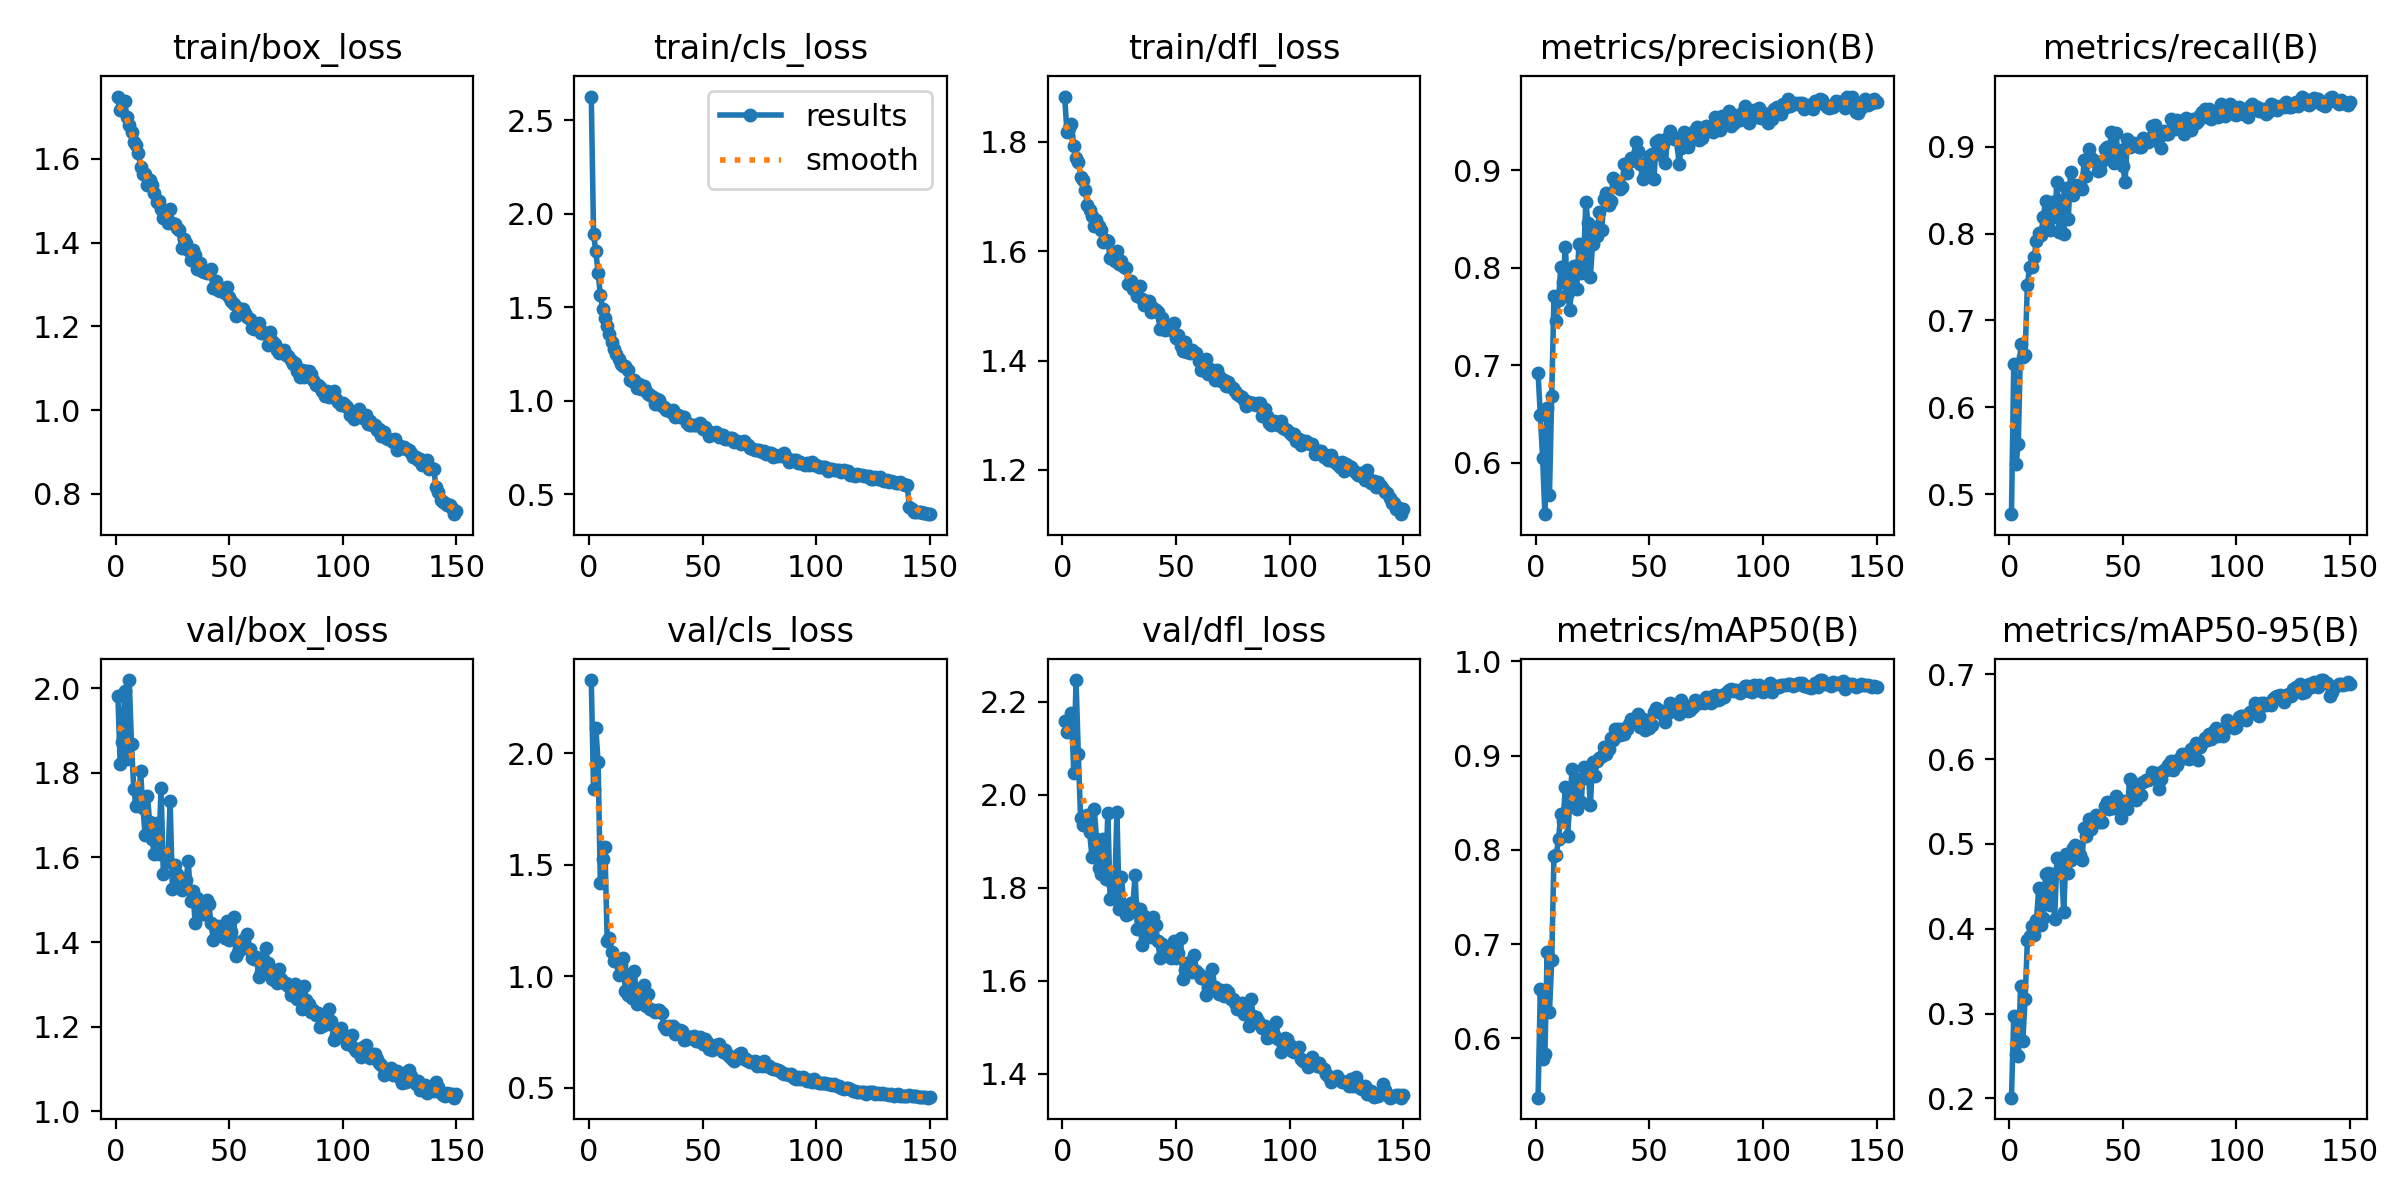

In [16]:
Image("/kaggle/working/runs/detect/train/results.png", width=600)

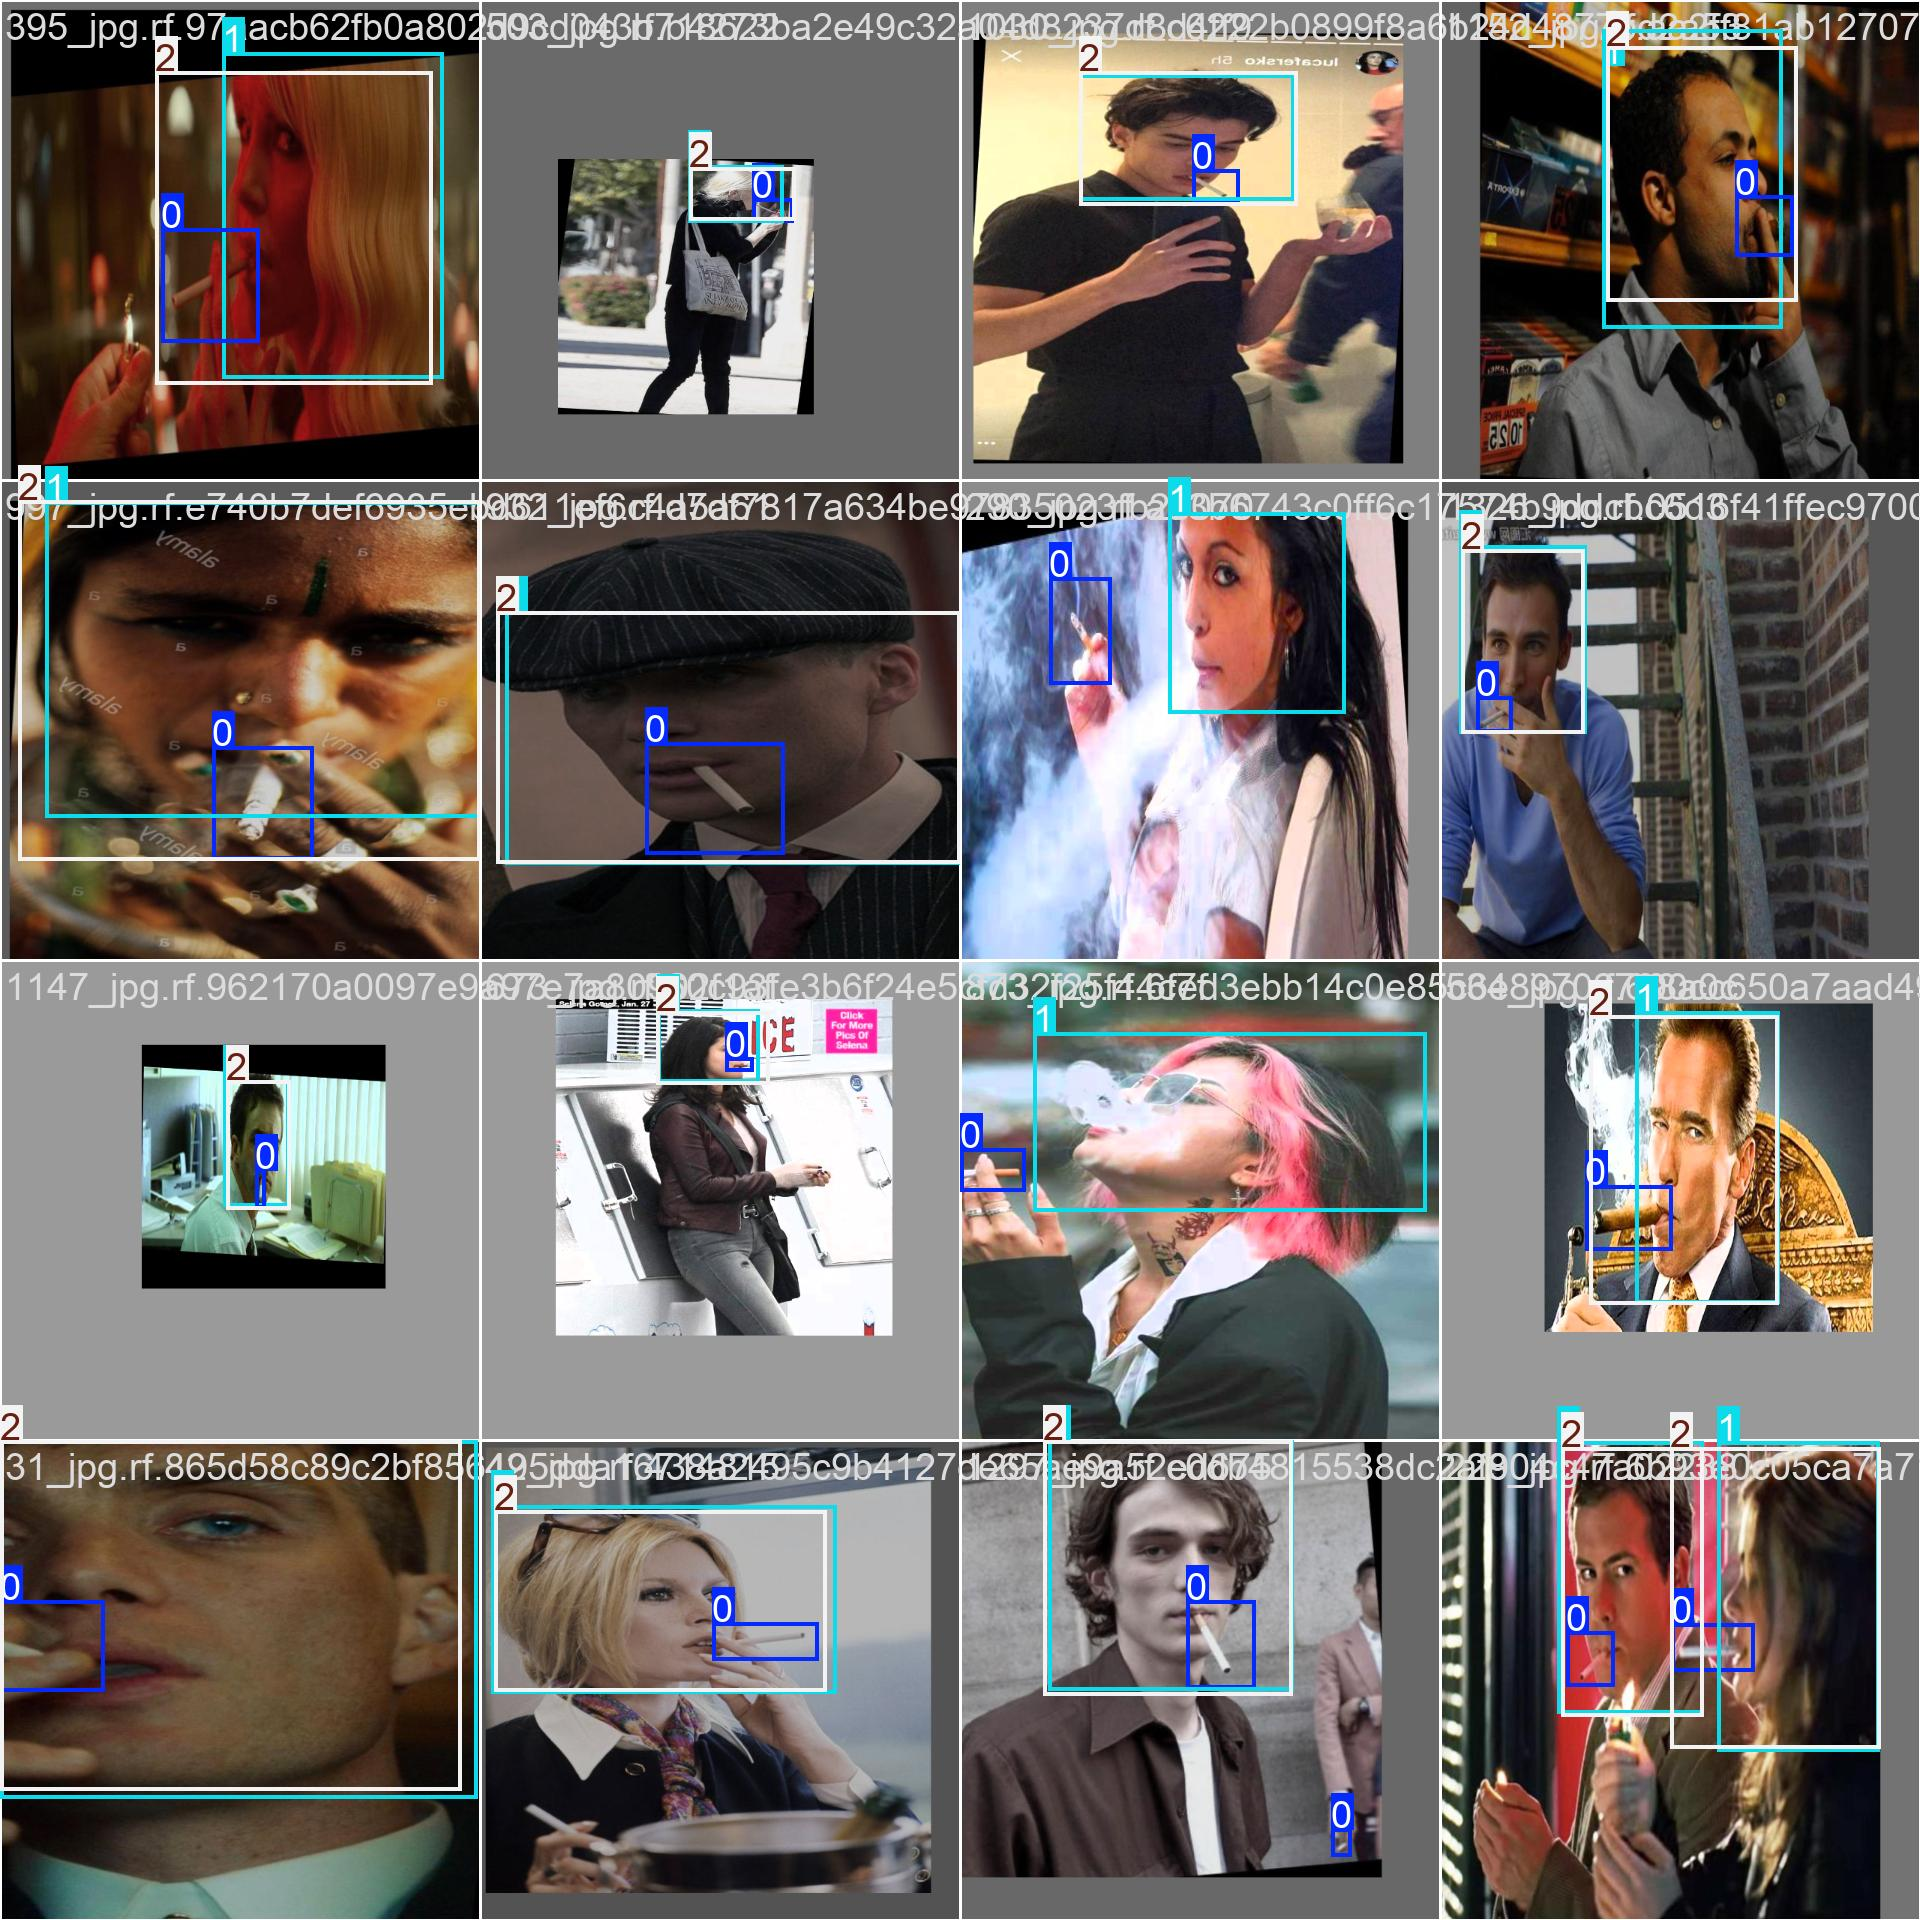

In [17]:
Image("/kaggle/working/runs/detect/train/train_batch14422.jpg", width=600)

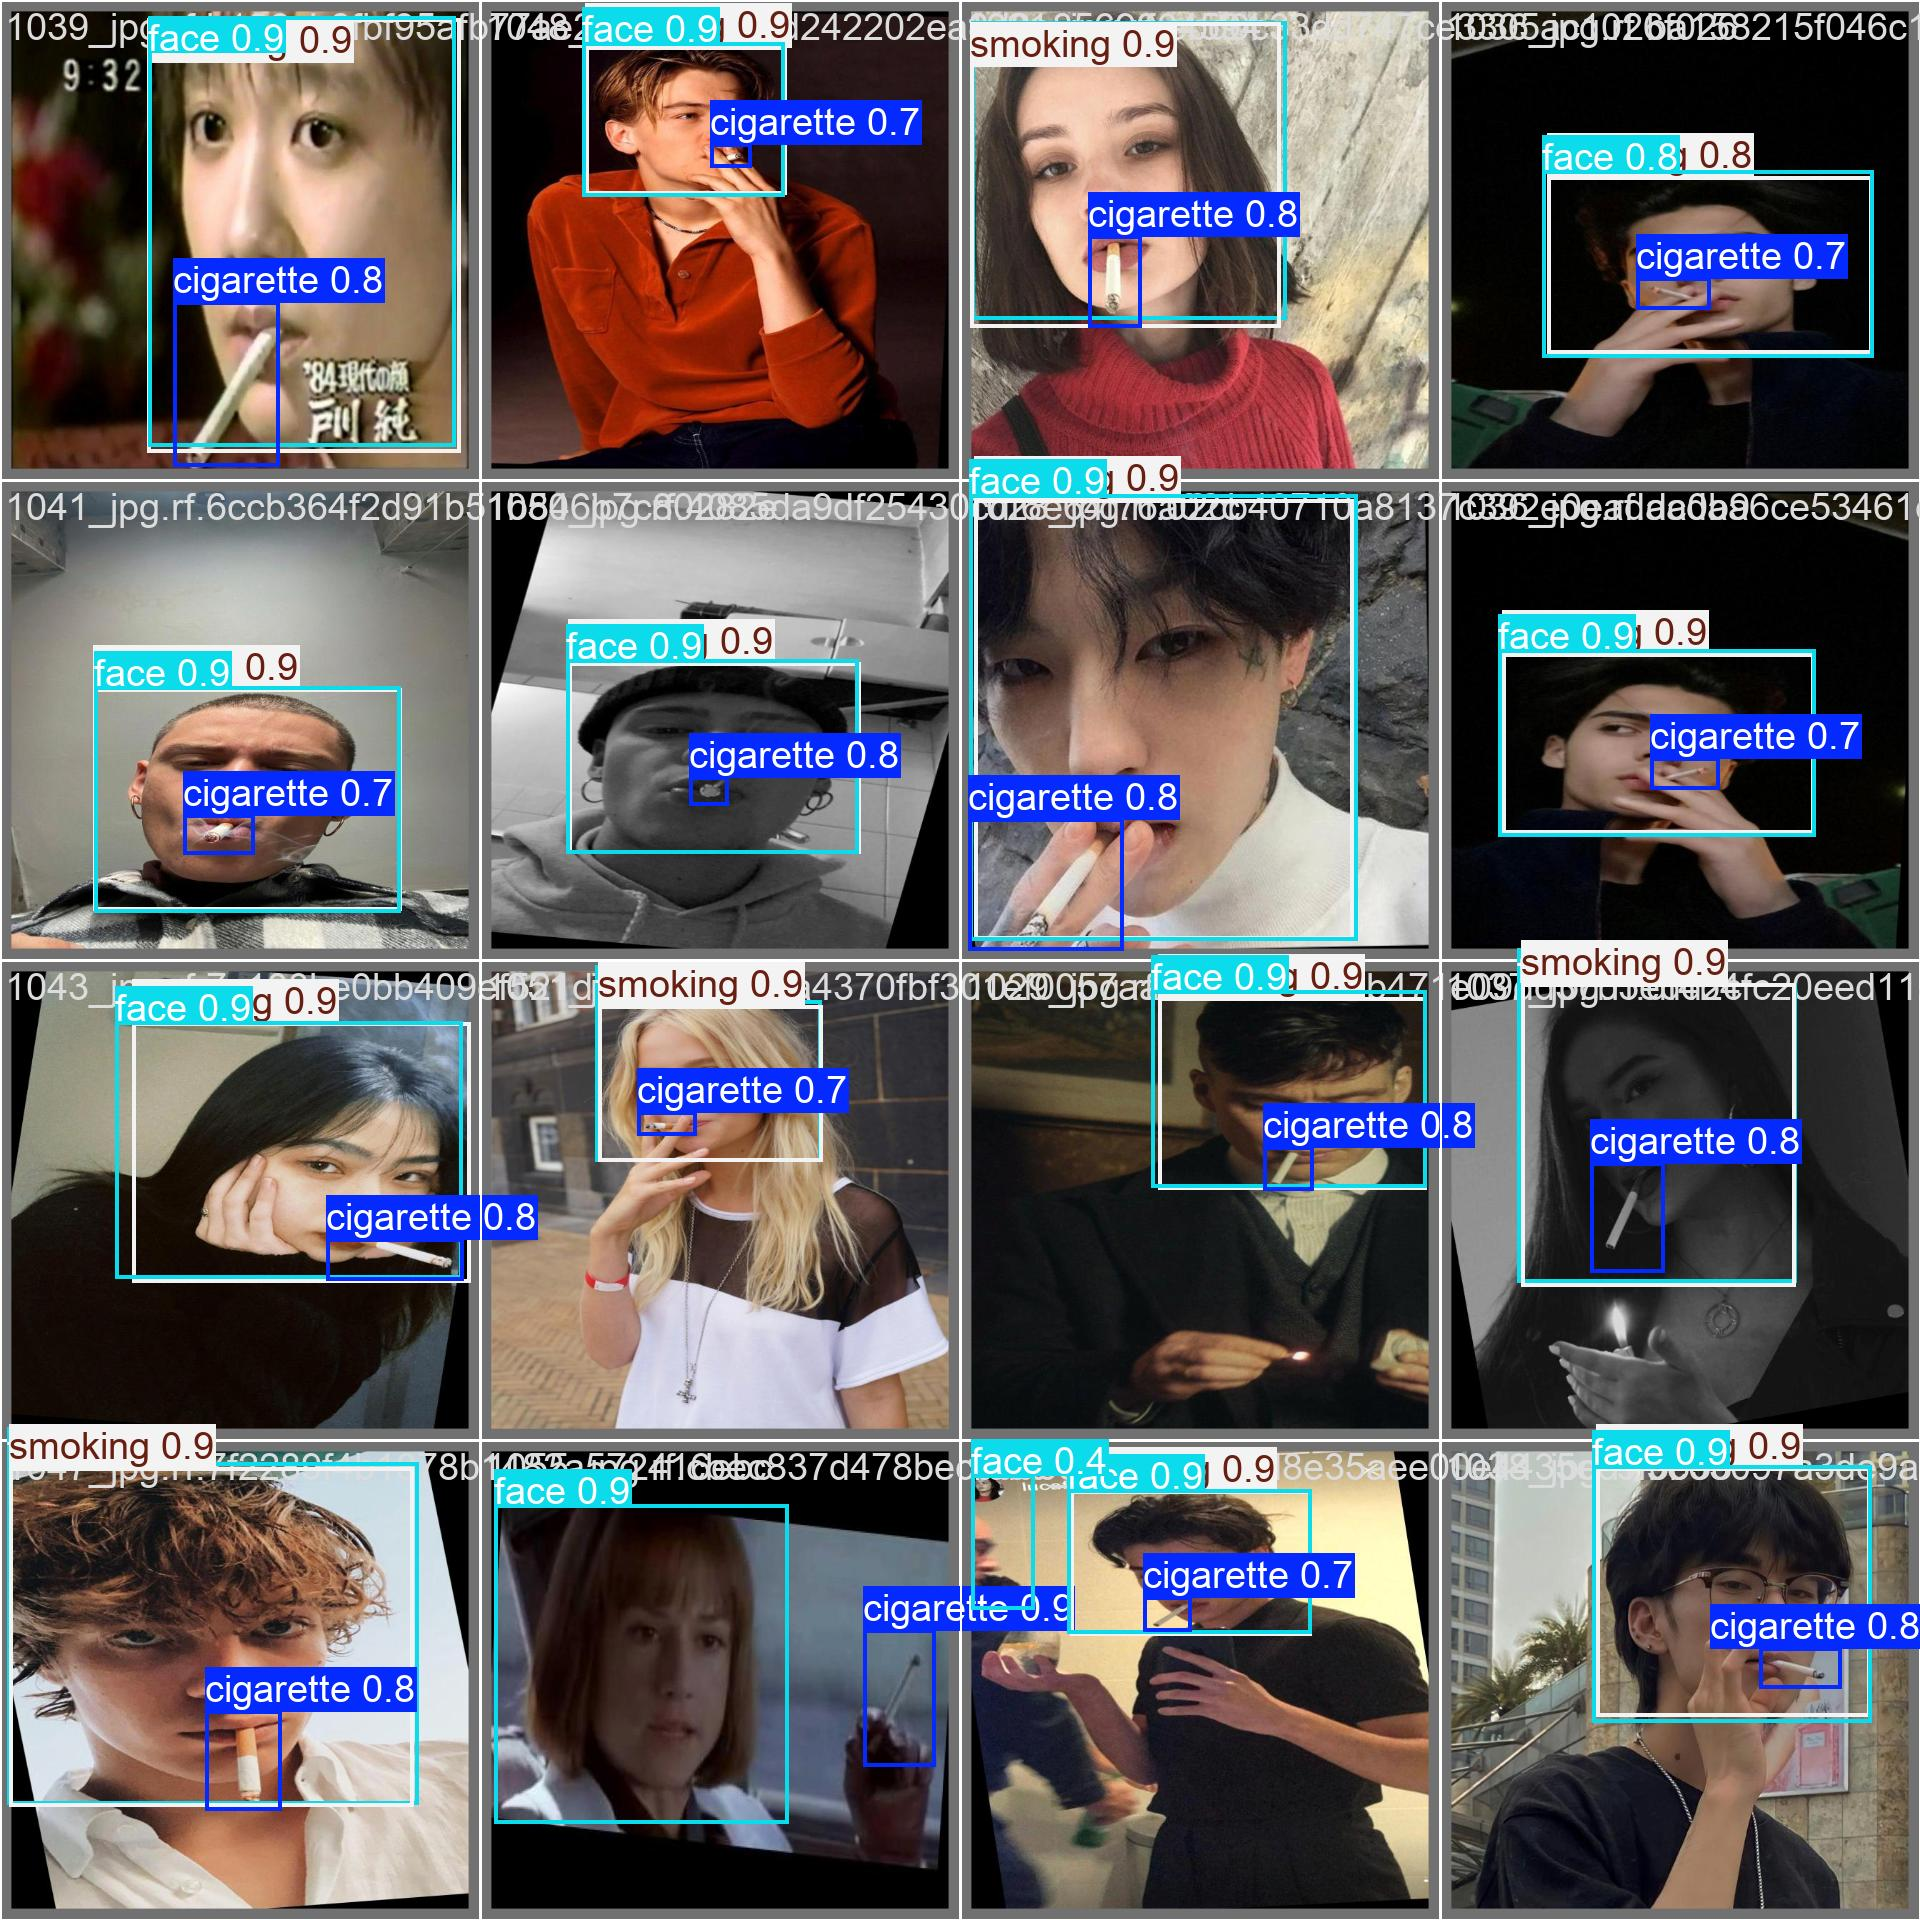

In [18]:
Image("/kaggle/working/runs/detect/train/val_batch1_pred.jpg", width=600)

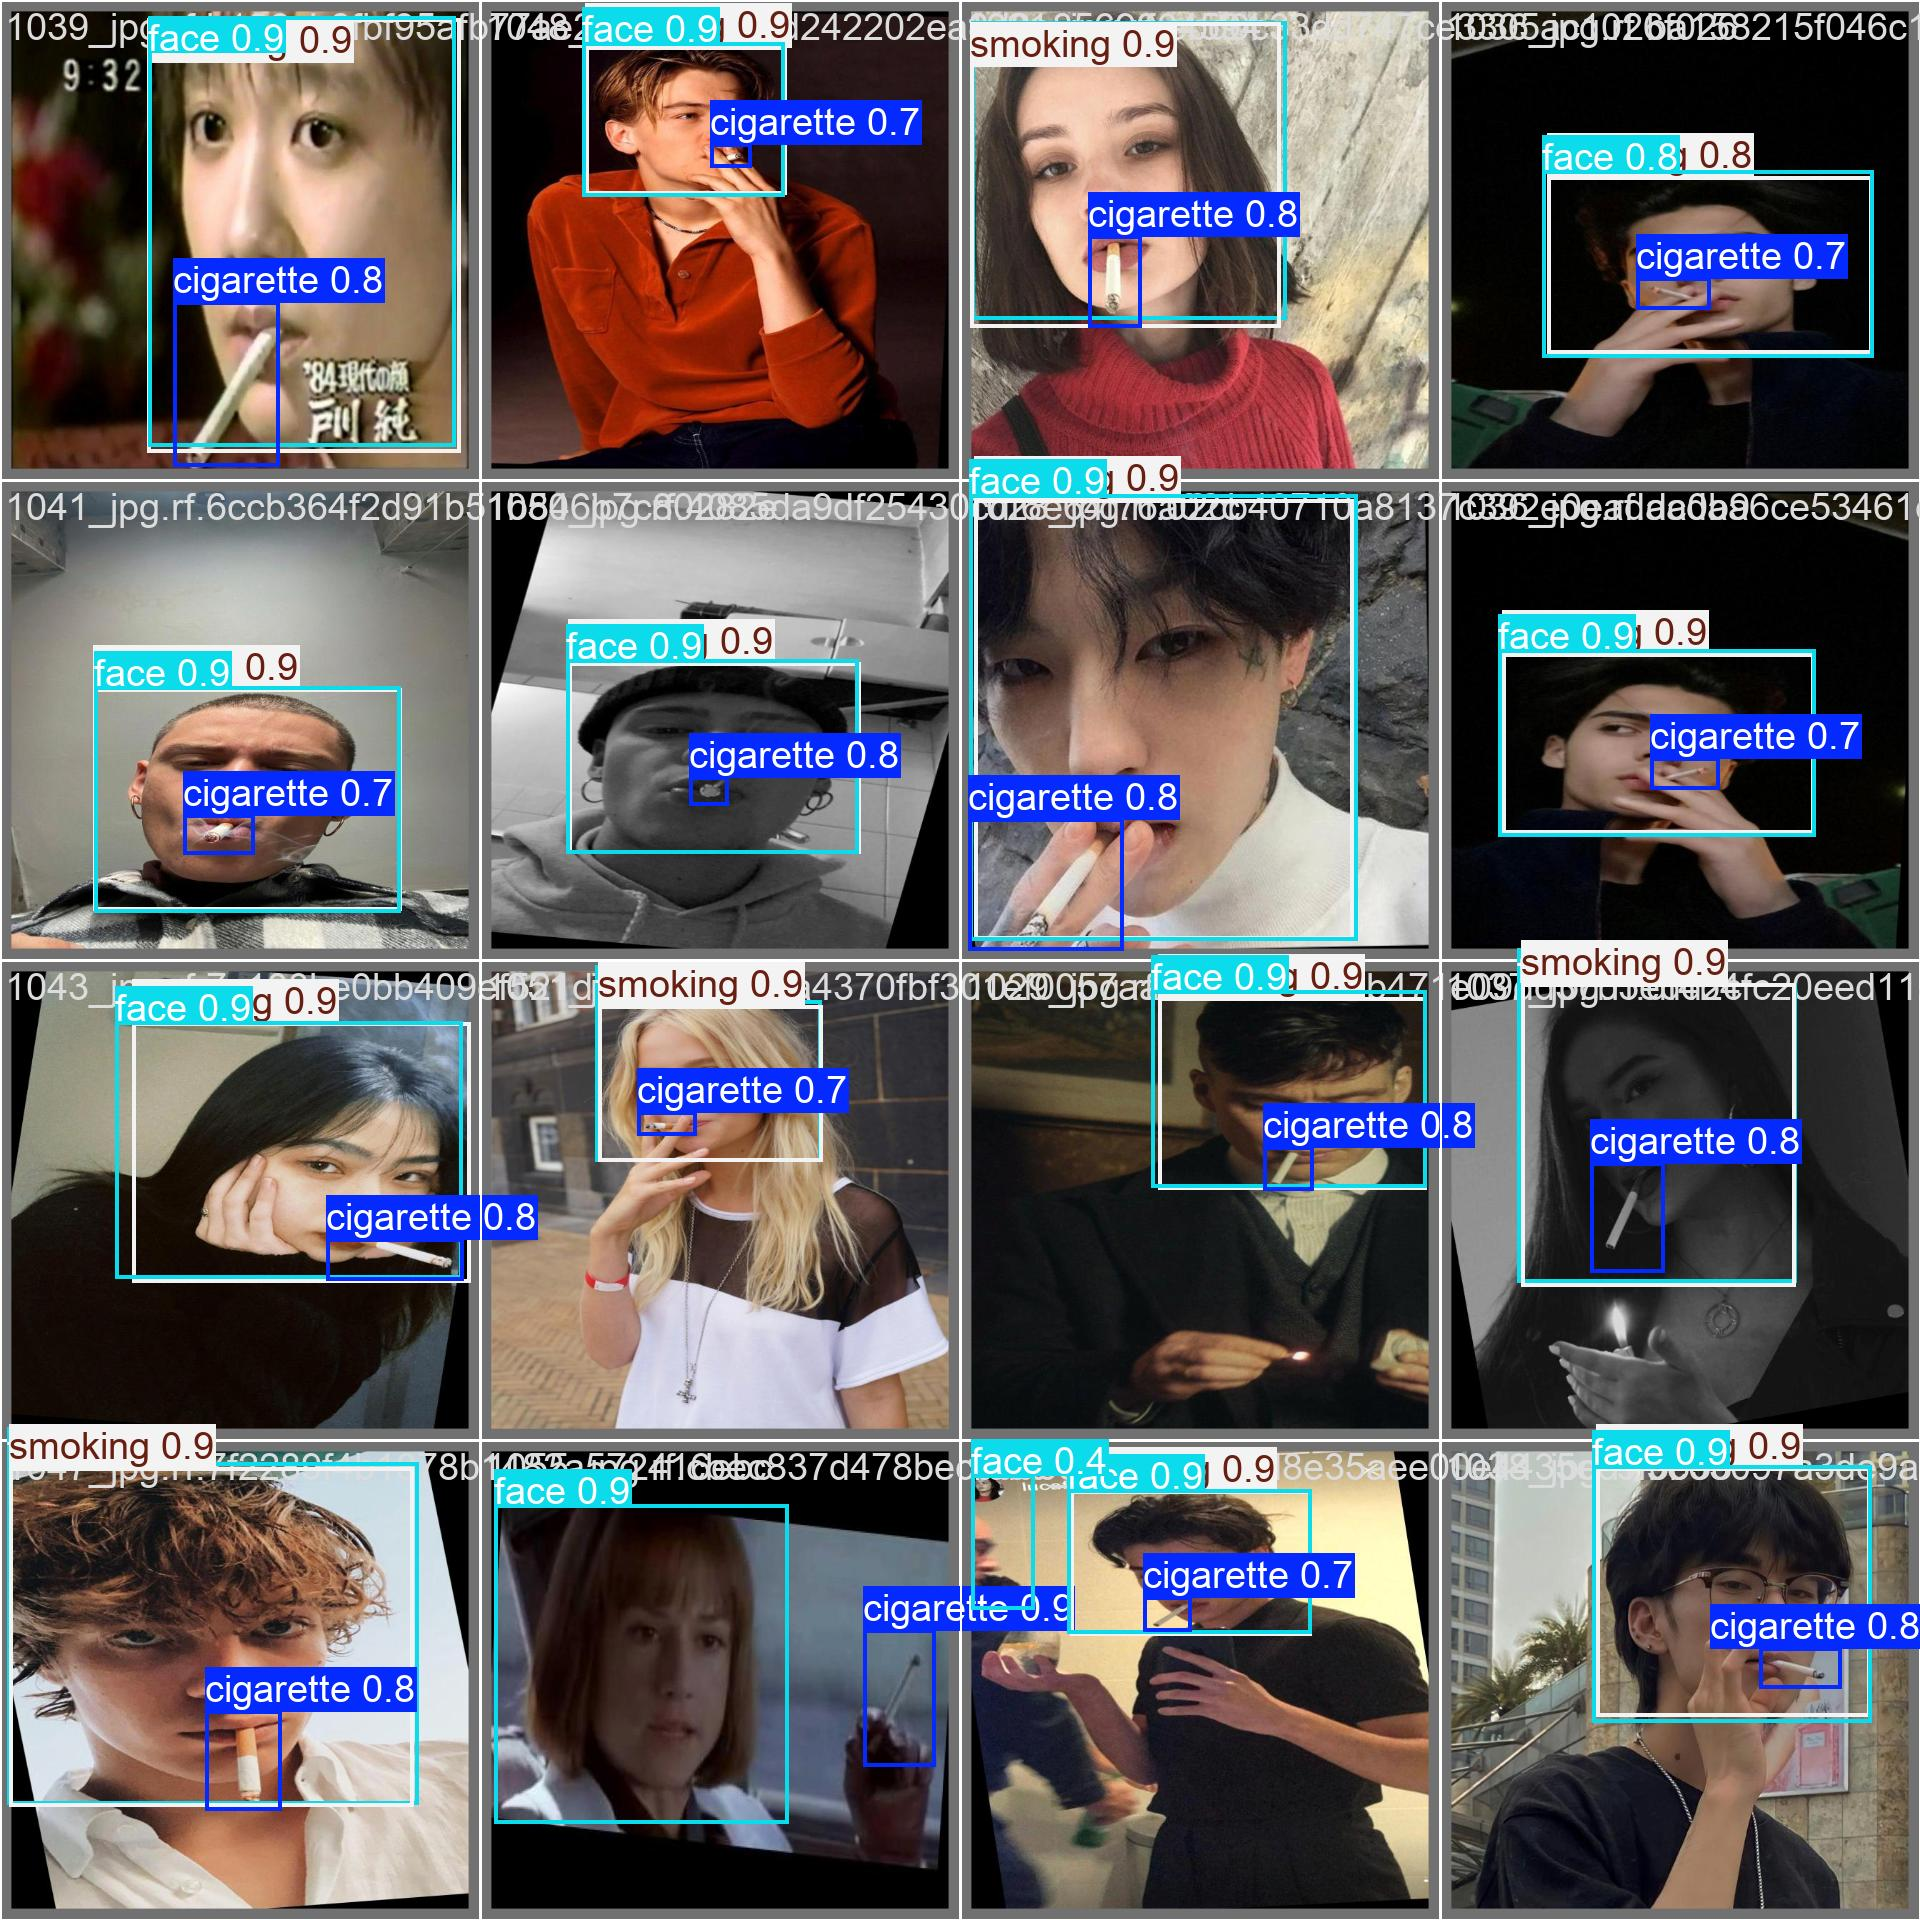

In [19]:
Image("/kaggle/working/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [20]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.5 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/working/smoking-3/valid/labels.cache... 467 images, 0 back
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        467       1338      0.974      0.949      0.975      0.693
             cigarette        463        479      0.955      0.894      0.941       0.55
                  face        465        526       0.98       0.99      0.994      0.767
               smoking        327        333      0.988      0.963       0.99      0.763
Speed: 0.7ms preprocess, 3.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Step # 08 Inference with Custom Model on Images**

In [22]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.5 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/230 /kaggle/working/smoking-3/test/images/1000-1-_jpg.rf.7e1e6af152f25a05ceab4a8e840907f4.jpg: 640x640 1 face, 1 smoking, 11.4ms
image 2/230 /kaggle/working/smoking-3/test/images/1000-15-_jpg.rf.ab4ea2998c1dc5bb771d42491e6a6e54.jpg: 640x640 1 cigarette, 3 faces, 1 smoking, 9.6ms
image 3/230 /kaggle/working/smoking-3/test/images/1000-3-_jpg.rf.050f007cf666699ea30d9ab245564d3b.jpg: 640x640 1 face, 2 smokings, 8.5ms
image 4/230 /kaggle/working/smoking-3/test/images/1000-6-_jpg.rf.d5fd4027d6f731aae12df50382bb40b2.jpg: 640x640 1 face, 1 smoking, 8.9ms
image 5/230 /kaggle/working/smoking-3/test/images/1002_jpg.rf.1d31a1c3a62cdfd535417b38ea72e5fd.jpg: 640x640 1 cigarette, 1 face, 1 smoking, 8.4ms
image 6/230 /kaggle/working/smoking-3/test/images/1004_jpg.rf.53543f51c9bc620dd24e2933fd27b30b.jpg: 640x640 1 cigarette, 1 face, 1 smo

In [24]:
!zip -r /kaggle/working/runs.zip /kaggle/working/runs

  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/535_jpg.rf.5f9a67b0a5bae64683f0fd6c2be7f463.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/1429_jpg.rf.9cde3774ac115904ed80774ad9ee427f.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/predict/381_jpg.rf.04e356853a062c2216a5f70e33fba17e.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/predict/425_jpg.rf.f011d03549325203848f970d4750029e.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/705_jpg.rf.d07d005df29eb60b71531ba05353cc1d.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/766_jpg.rf.dd5bc1a7661740a4857242afce010725.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/8_jpg.rf.9646fea558f53ce543c407ecc6041c84.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/501_jpg.rf.bbbc66ab8390c63ded92beded15c90b6.jpg (deflate

In [25]:
!zip -r /kaggle/working/smoking-3.zip /kaggle/working/smoking-3

  adding: kaggle/working/smoking-3/ (stored 0%)
  adding: kaggle/working/smoking-3/README.dataset.txt (deflated 10%)
  adding: kaggle/working/smoking-3/valid/ (stored 0%)
  adding: kaggle/working/smoking-3/valid/labels.cache (deflated 65%)
  adding: kaggle/working/smoking-3/valid/labels/ (stored 0%)
  adding: kaggle/working/smoking-3/valid/labels/359_jpg.rf.88e183215acf4cf871353af02a0dd33e.txt (deflated 38%)
  adding: kaggle/working/smoking-3/valid/labels/IMG_0130_jpg.rf.ccd4531580c132c1af036d654c7b94f7.txt (deflated 46%)
  adding: kaggle/working/smoking-3/valid/labels/311_jpg.rf.bf311ae2f47d768bf66492e35e6913e7.txt (deflated 47%)
  adding: kaggle/working/smoking-3/valid/labels/1028_jpg.rf.02cb40710a8137c392e0eadaa0b9b4fe.txt (deflated 44%)
  adding: kaggle/working/smoking-3/valid/labels/IMG_4366_JPG_jpg.rf.5495198774b0e1487282d4c02cb00deb.txt (deflated 47%)
  adding: kaggle/working/smoking-3/valid/labels/1457_jpeg_jpg.rf.90886f1251d40a7b6e8e48c274b9c17f.txt (deflated 44%)
  adding: ka